In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


(4052, 1568)
(800, 1568)


0.7568627450980392

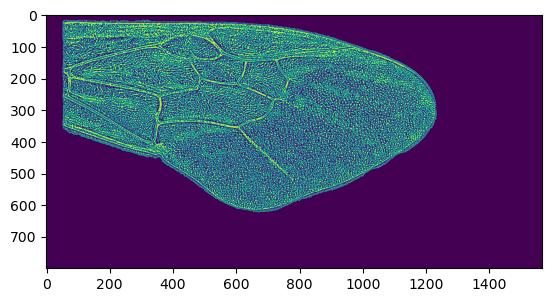

In [68]:
fps = glob('../2_live_bees/2_card_segs/*')
np.random.seed(42)
np.random.shuffle(fps)

fp = fps[0]
img = cv2.imread(fp)
img[np.where(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) == 255)] = 0
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.blur(img, (3,3))
print(img.shape)
img = img[1700:2500]
#img = cv2.resize(img, (img.shape[1]//4, img.shape[0]//4))
print(img.shape)
thres = img < 150
plt.imshow(thres.astype('uint8')*255)

edge_sobel = filters.sobel(img)
plt.imshow(edge_sobel)

edge_laplace = filters.laplace(img, ksize=15)
plt.imshow((edge_laplace*255 / edge_laplace.max()).astype('uint8'))
edge_laplace.max()

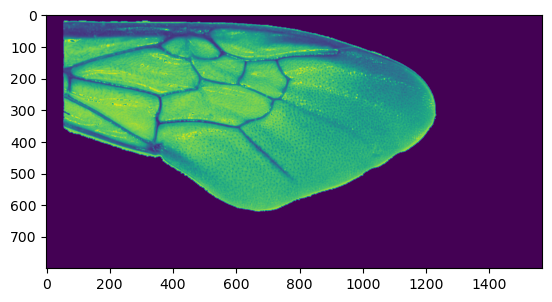

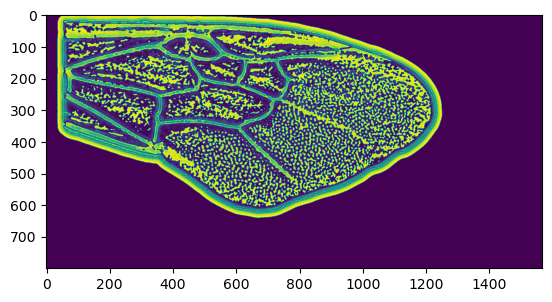

In [69]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift


dog = difference_of_gaussians(img, 2, 7)
plt.imshow(img)
plt.figure()
plt.imshow((255*dog / dog.max()).astype('uint8'))